In [5]:
!pip install numpy

Training for the AND gate

Epoch 1/20, Total Errors: 3
Epoch 2/20, Total Errors: 0

Training for the OR gate

Epoch 1/20, Total Errors: 2
Epoch 2/20, Total Errors: 2
Epoch 3/20, Total Errors: 1
Epoch 4/20, Total Errors: 0


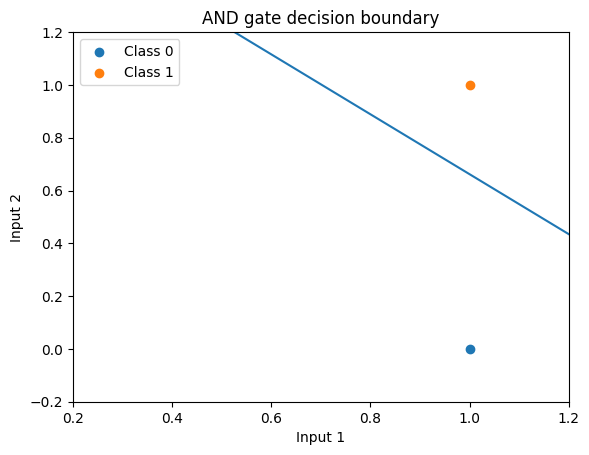

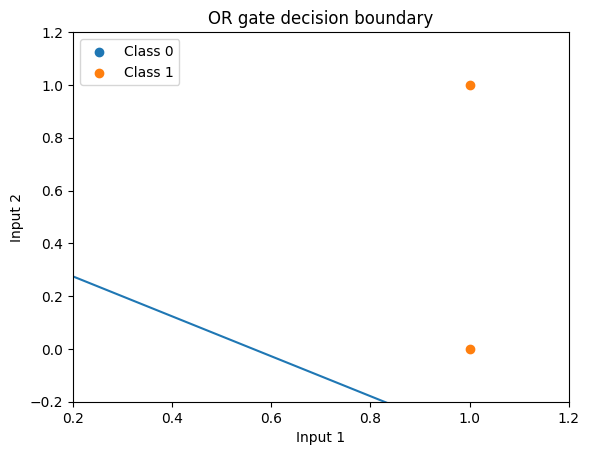

In [5]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs=2, learning_rate=0.2):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_inputs) * 2 - 1
        self.bias = 0.0

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return self._activation_function(total)

    def fit(self, data, epochs=20):
        for epoch in range(epochs):
            total_errors = 0
            for inputs, target in data:
                inputs = np.array(inputs)
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                total_errors += abs(error)

            print(f"Epoch {epoch + 1}/{epochs}, Total Errors: {total_errors}")

            if total_errors == 0:
                break

# AND gate data
and_gate_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# OR gate data
or_gate_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 1)
]

# Create perceptrons for AND and OR gates
p_and = Perceptron()
p_or = Perceptron()

print("Training for the AND gate\n")
p_and.fit(and_gate_data)

print("\nTraining for the OR gate\n")
p_or.fit(or_gate_data)

# Visualize decision boundaries (assuming you defined this function earlier)
plot_decision_boundary(p_and, and_gate_data, "AND gate decision boundary")
plot_decision_boundary(p_or, or_gate_data, "OR gate decision boundary")


In [9]:
!pip install matplotlib


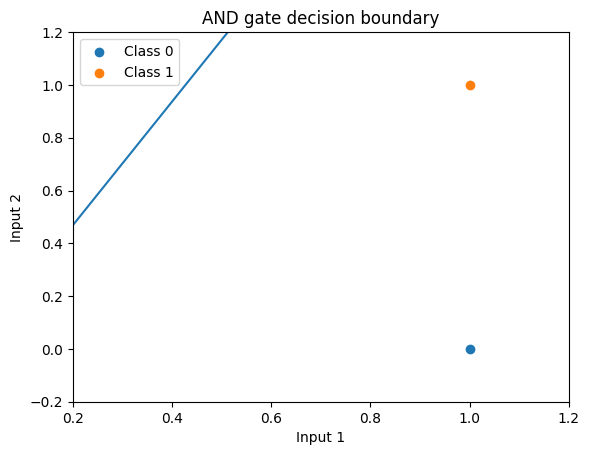

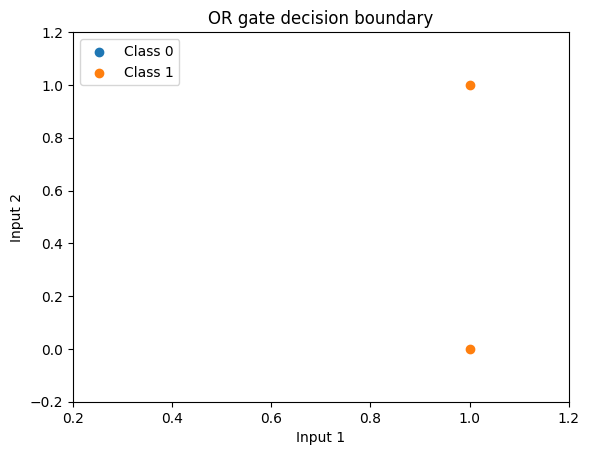

In [3]:
import matplotlib.pyplot as plt

def plot_points(data, ax):
    pts0 = np.array([x for x, t in data if t == 0])
    pts1 = np.array([x for x, t in data if t == 1])
    if len(pts0):
        ax.scatter(pts0[:,0], pts0[:,1], label="Class 0")
    if len(pts1):
        ax.scatter(pts1[:,0], pts1[:,1], label="Class 1")

def plot_decision_boundary(model, data, title):
    fig, ax = plt.subplots()
    plot_points(data, ax)
    if abs(model.weights[1]) > 1e-12:
        xs = np.linspace(-0.2, 1.2, 100)
        ys = -(model.weights[0] * xs + model.bias) / model.weights[1]
        ax.plot(xs, ys)

    ax.set_xlim(0.2, 1.2)
    ax.set_ylim(-0.2,1.2)
    ax.set_xlabel("Input 1")
    ax.set_ylabel("Input 2")
    ax.legend()
    ax.set_title(title)
    plt.show()

#---------Visualize AND ------------
plot_decision_boundary(p_and, and_gate_data, "AND gate decision boundary")

#---------Visualize OR -------------
plot_decision_boundary(p_or, or_gate_data, "OR gate decision boundary")


1) Run the code. Does the perceptron successfully learn the AND gate logic? At what epoch does the error become zero?

Yes. A perceptron can perfectly learn the AND gate, because the AND logic is linearly separable. With the learning rate of 0.2 and random initial weights in [-1,1]
training usually converges within a few epochs. The exact epoch when the error becomes zero depends on the initial random weights.


2) How do the weights and bias change during the training process? What do these changes represent?

the weights change to adjust the slope and orientation of the decision boundary so that the perceptron correctly classifies all inputs, while the bias shifts this boundary up or down without changing its slope. These adjustments represent the model’s learning process—each change in weights or bias corresponds to correcting a previous misclassification. As training progresses and the perceptron sees fewer errors, the weight and bias updates become smaller, and once the total error reaches zero, the perceptron has perfectly learned the AND gate logic.

In [6]:
#XOR Gate data

xor_gate_data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0)
]

p_xor = Perceptron()
p_xor.fit(xor_gate_data)

print("Training for the XOR gate\n")
for inputs, target in xor_gate_data:
  inputs_np = np.array(inputs)
  prediction = p_xor.predict(inputs_np)
  print(f"Inputs: {inputs}, Target: {target}, Prediction: {prediction}")

Epoch 1/20, Total Errors: 2
Epoch 2/20, Total Errors: 3
Epoch 3/20, Total Errors: 2
Epoch 4/20, Total Errors: 3
Epoch 5/20, Total Errors: 4
Epoch 6/20, Total Errors: 4
Epoch 7/20, Total Errors: 4
Epoch 8/20, Total Errors: 4
Epoch 9/20, Total Errors: 4
Epoch 10/20, Total Errors: 4
Epoch 11/20, Total Errors: 4
Epoch 12/20, Total Errors: 4
Epoch 13/20, Total Errors: 4
Epoch 14/20, Total Errors: 4
Epoch 15/20, Total Errors: 4
Epoch 16/20, Total Errors: 4
Epoch 17/20, Total Errors: 4
Epoch 18/20, Total Errors: 4
Epoch 19/20, Total Errors: 4
Epoch 20/20, Total Errors: 4
Training for the XOR gate

Inputs: [0, 0], Target: 0, Prediction: 1
Inputs: [0, 1], Target: 1, Prediction: 1
Inputs: [1, 0], Target: 1, Prediction: 0
Inputs: [1, 1], Target: 0, Prediction: 0


1) Why does the perceptron fail to learn the XOR gate? Connect this back to the lecture's concept of linear separability.

The perceptron fails to learn the XOR gate because XOR is not linearly separable—there is no single straight line that can divide the input space into two classes (outputs 0 and 1).A single-layer perceptron can only solve problems where all positive and negative examples can be separated by a hyperplane. XOR violates this because the points (0,1) and (1,0) (output 1) are diagonally opposite, and any line that separates them from (0,0) and (1,1) (output 0) will always misclassify at least one point.

2) Based on this limitation, what kind of model do you think would be necessary to solve the XOR problem? (Hint: Think about adding more layers).
The model need a more complex model—specifically, a multi-layer perceptron with at least one hidden layer.


3) Brainstorm some real-world problems that might be solved with a simple perceptron and would require a more complex network.

Simple perceptrons are sufficient for problems like spam filtering with very clear, linearly separable word features, basic image classification tasks like distinguishing dark and bright images, or deciding whether a number is positive or negative.

more complex networks are needed for problems such as speech recognition, image classification of handwritten digits, predicting stock market trends, or detecting objects in images,